In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean

import sys
sys.path.append("../")
import zerosSpectrogram

//anaconda/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
//anaconda/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


# Free parameters: duration and SNR

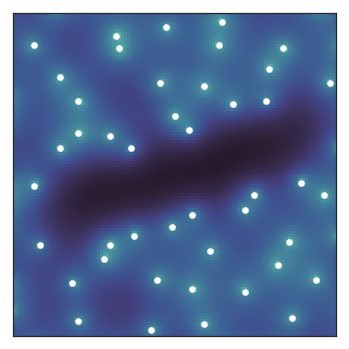

In [53]:
# simulate first a signal
# generate a chirp signal in wgn
np.random.seed(12)
base = 128
duration = base - 20
SNR = 10
Sww, pos_exp, stft, chirp = zerosSpectrogram.experiments.demoSpectrogramSignal(SNR, duration, viz=True, shrink=False)

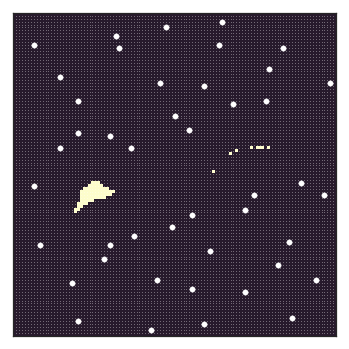

In [54]:
# fix segmentation radius
radi_seg = 1
empty_mask = zerosSpectrogram.utils.findCenterEmptyBalls(Sww, pos_exp, radi_seg)

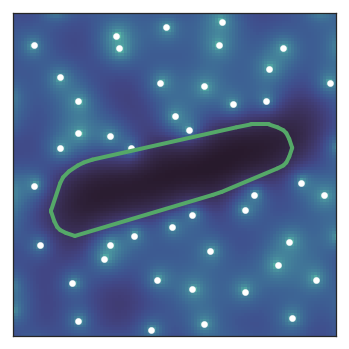

In [55]:
# plot convex Hull
hull = zerosSpectrogram.utils.getConvexHull(Sww, pos_exp, empty_mask)

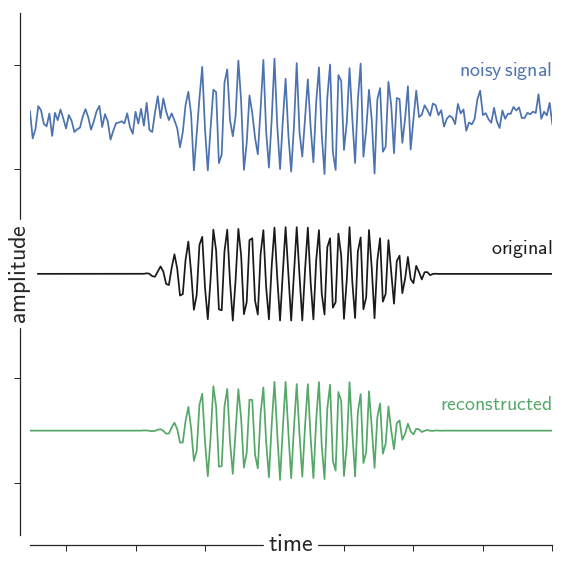

In [56]:
# reconstruction
amp = np.sqrt(2*SNR)
zerosSpectrogram.utils.reconstructionSignal(hull, stft, amp*chirp)